In [1]:
from qiskit import *
import math
import time
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import numpy as np

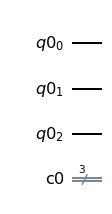

In [2]:
qr = QuantumRegister(3) # create register to store bits
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr) # creates the circuit
%matplotlib inline
circuit.draw(output='mpl')

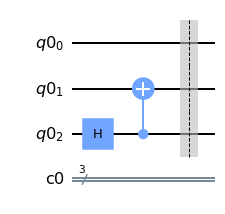

In [3]:
circuit.h(2)
circuit.cx(qr[2], qr[1])
circuit.barrier()
circuit.draw(output='mpl')

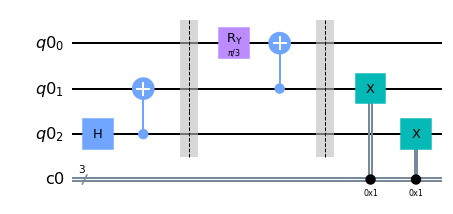

In [4]:
pi = math.pi

circuit.ry(pi/3,0)
circuit.cx(qr[1], qr[0])
#circuit.measure(0,0)
circuit.barrier()
circuit.x(qr[1]).c_if(cr,1)
circuit.x(qr[2]).c_if(cr,1)


circuit.draw(output="mpl")

In [5]:
circuit.cx(qr[1], qr[0])
circuit.ry(-pi/3,0)
circuit.cx(qr[2], qr[1])
circuit.h(2)

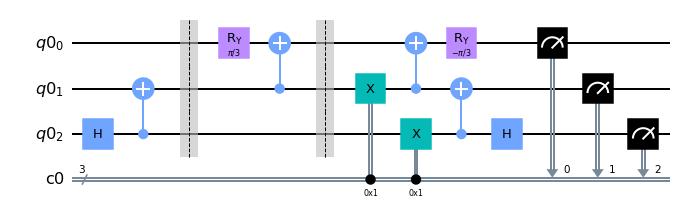

In [6]:
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)

circuit.draw(output="mpl")

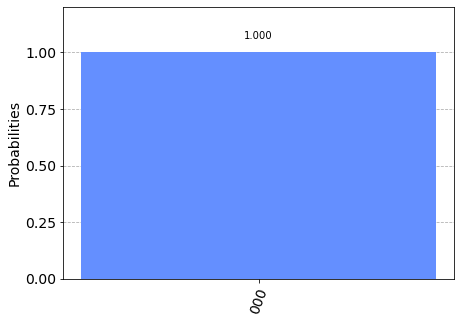

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 8000).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
